# Mutual Info Score

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../Datasets/breast_cancer.csv", header=None)
data.columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breaast-quad', 'irradiat', 'class']
data.dropna(axis=0, inplace=True)


In [3]:
y = data['class']
X = data.drop('class', axis=1)
#X = data.iloc[:,:9]

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(y.reshape(-1,1))
y = encoder.transform(y.reshape(-1, 1))

In [6]:
encoder.fit(X)
X = encoder.transform(X)

We want to compute $MIC$. In the case where $X$ is categorical and $Y$ is numerical, is:
$$ MIC(X,Y) = \int \int p(x,y) \log(\frac{p(x,y)}{p(x)p(y)}) dx dy $$

When both $X$ and $Y$ are categorichal, with $X$ having $k$ classess and $Y$ having $h$ classess it is:

\begin{align} 
MIC(X,Y) &= \sum_{y \in Y} \sum_{x \in X} p(x,y) \log(\frac{p(x,y)}{p(x)p(y)}) \\
& = p(x = x_1,y = y_1) \log(\frac{p(x=x_1,y=y_1)}{p(x=x_1)p(y=y_1)}) + \cdots + p(x = x_k,y = y_1) \log(\frac{p(x=x_k,y=y_1)}{p(x=x_k)p(y=y_1)}) \ + \\
& \vdots \\
& + p(x = x_1,y = y_h) \log(\frac{p(x=x_1,y=y_h)}{p(x=x_1)p(y=y_h)}) + \cdots + p(x = x_k,y = y_h) \log(\frac{p(x=x_k,y=y_h)}{p(x=x_k)p(y=y_h)}) = \\
\end{align}

and: $$p(x = x_i , y = y_j) = p(x = x_i | y = y_j) p(y = y_j)  = \frac{\#x_i}{|y_j|}  \frac{\#y_j}{|Y|}$$.
So:
$$ MIC(X,Y) = \sum_{y \in Y} \sum_{x \in X} p(x|y)p(y) \log(\frac{p(x|y)p(y)}{p(x)p(y)}) $$

In [7]:
def MIC(x,y):
    
    x_levels = np.unique(x)
    y_levels = np.unique(y)
    # count how many elements per each level for each i={1,...,k} and j={1,...,h}
    x_count = np.array([np.count_nonzero(x == i) for i in x_levels])
    y_count = np.array([np.count_nonzero(y == i) for i in y_levels])

    mic = 0
    for i in range(len(y_levels)):
        for j in range(len(x_levels)):

            joint = (np.count_nonzero((y == i) & (x == j)) / x_count[j]) * x_count[j]/len(x)
            if joint == 0:
                continue
            else:
                mic += joint * np.log(joint/(x_count[j]/len(x)*y_count[i]/len(y)))
    return mic
    

    

In [8]:
def MIC_specular(x,y):
    
    x_levels = np.unique(x)
    y_levels = np.unique(y)
    # count how many elements per each level for each i={1,...,k} and j={1,...,h}
    x_count = np.array([np.count_nonzero(x == i) for i in x_levels])
    y_count = np.array([np.count_nonzero(y == i) for i in y_levels])

    mic = 0
    for i in range(len(y_levels)):
        for j in range(len(x_levels)):

            joint = (np.count_nonzero((y == i) & (x == j)) / y_count[i]) * y_count[i]/len(y)
            if joint == 0:
                continue
            else:
                mic += joint * np.log(joint/(x_count[j]/len(x)*y_count[i]/len(y)))
    return mic

In [9]:
for i in range(X.shape[1]):
    print(f'MIC between {i} covriate and target: ', MIC(X[:,i], y.ravel()))

MIC between 0 covriate and target:  0.01436812519181932
MIC between 1 covriate and target:  0.008006352932226554
MIC between 2 covriate and target:  0.04259861458170641
MIC between 3 covriate and target:  0.05712993478195178
MIC between 4 covriate and target:  0.038734513190465024
MIC between 5 covriate and target:  0.06136629232725527
MIC between 6 covriate and target:  0.0008544651540266287
MIC between 7 covriate and target:  0.005989752805088627
MIC between 8 covriate and target:  0.0240547232042084


In [10]:
for i in range(X.shape[1]):
    print(f'MIC between {i} covriate and target: ', MIC_specular(X[:,i], y.ravel()))

MIC between 0 covriate and target:  0.01436812519181932
MIC between 1 covriate and target:  0.008006352932226513
MIC between 2 covriate and target:  0.0425986145817064
MIC between 3 covriate and target:  0.05712993478195178
MIC between 4 covriate and target:  0.038734513190465024
MIC between 5 covriate and target:  0.0613662923272552
MIC between 6 covriate and target:  0.0008544651540266287
MIC between 7 covriate and target:  0.005989752805088627
MIC between 8 covriate and target:  0.024054723204208386


In [11]:
from sklearn.metrics import mutual_info_score

for i in range(X.shape[1]):
    print(f'MIC between {i} covriate and target: ', mutual_info_score(X[:,i], y.ravel()))

MIC between 0 covriate and target:  0.014368125191819573
MIC between 1 covriate and target:  0.008006352932227068
MIC between 2 covriate and target:  0.04259861458170642
MIC between 3 covriate and target:  0.05712993478195197
MIC between 4 covriate and target:  0.038734513190465614
MIC between 5 covriate and target:  0.06136629232725545
MIC between 6 covriate and target:  0.0008544651540267068
MIC between 7 covriate and target:  0.005989752805088747
MIC between 8 covriate and target:  0.024054723204209066


# k-Means

In [12]:
import math
import pandas as pd
import numpy as np

In [13]:
class MyKmeans:
    """
    MyKmeans is a class that implements the k-means clustering algorithm.

    Attributes:
    -----------
    k : int
        The number of clusters to form.

    z : numpy.ndarray, shape (n_samples,)
        The final assignment of each point to a cluster.

    loss : float
        The total loss after clustering, defined as the sum of the squared distances
        between each point and its assigned cluster center.

    C : numpy.ndarray, shape (k, n_features)
        The final cluster centers.

    n_iterations : int
        The number of iterations required to converge.

    C_history : numpy.ndarray, shape (k, n_features, n_iterations+1)
        A record of the cluster centers at each iteration.

    z_history : numpy.ndarray, shape (n_samples, n_iterations+1)
        A record of the assignment of each point to a cluster at each iteration.
    """
    def __init__(self, k):
        """
        Initializes a new instance of the MyKmeans class.

        Parameters:
        -----------
        k : int
            The number of clusters to form.
        """
        self.k = k
        self.z = None
        self.loss = None
        self.C = None
        self.n_iterations = 0
        self.C_history = None
        self.z_history = None

    def fit(self, X, random_choice=0):
        """
        Fits the k-means algorithm to the provided dataset X.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            The input data to cluster.
            
        random_choice : integer (default=0)
            Seed value for random initialization of centroids.
    
        Returns:
        --------
        None
        """
        # first initialization
        np.random.seed(random_choice)
        c_idxs = np.random.choice(X.shape[0], size=self.k)
        self.C = np.array(X[c_idxs])
        self.z = np.zeros(X.shape[0])
        tmp = np.ones(X.shape[0])
        # Initialize C_history and z_history arrays
        self.C_history = np.empty((self.k, X.shape[1], 0))
        self.z_history = np.empty((X.shape[0], 0))
        
        while not np.array_equal(self.z, tmp):
            self.n_iterations +=1

            # Append current C and z values to C_history and z_history respectively
            self.C_history = np.concatenate((self.C_history, self.C[..., np.newaxis]), axis=-1)
            self.z_history = np.concatenate((self.z_history, self.z[..., np.newaxis]), axis=-1)

            tmp = np.copy(self.z)
            
            # assign each point to its neares neighbor
            for i in range(X.shape[0]):
                best_d = math.inf
                nearest_center = None
                for j in range(self.k):
                    d = np.linalg.norm(X[i] - self.C[j,:])
                    if d<best_d:
                        best_d = d
                        nearest_center = j
                self.z[i] = nearest_center

            # recompute the centers
            for i in range(self.k):
                idxs = np.where(self.z == i)[0] # index of datapoint in cluster i 
                self.C[i,:] = np.mean(X[idxs,:], axis=0) # update centers

        self.loss = 0
        for i in range(self.k):
            idxs = np.where(self.z == i)[0]
            for j in range(len(idxs)):
                self.loss += np.linalg.norm(X[j] - self.C[i,:])

        # Append final C and z values to C_history and z_history respectively
        self.C_history = np.concatenate((self.C_history, self.C[..., np.newaxis]), axis=-1)
        self.z_history = np.concatenate((self.z_history, self.z[..., np.newaxis]), axis=-1)
                    
            

In [14]:
X = np.genfromtxt("../Datasets/s3.txt")
y = np.genfromtxt("../Datasets/s3.txt")

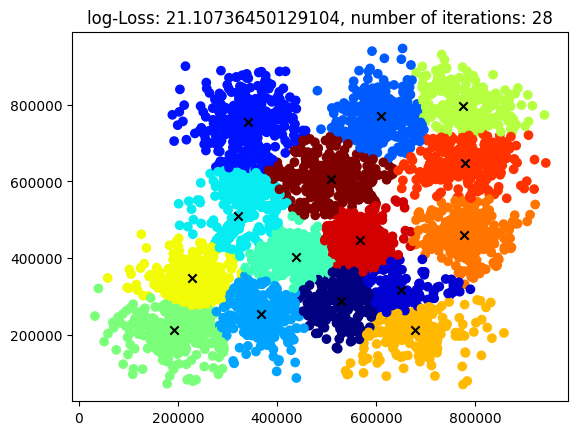

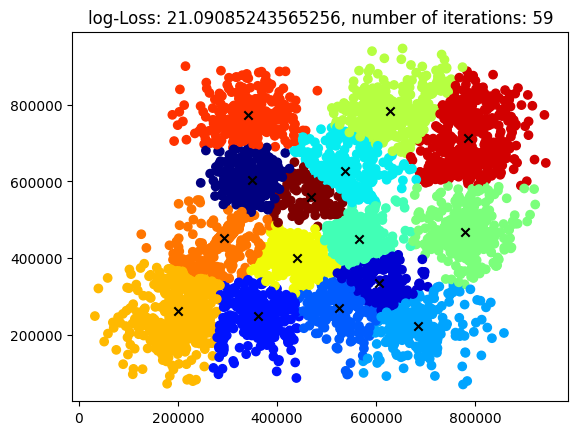

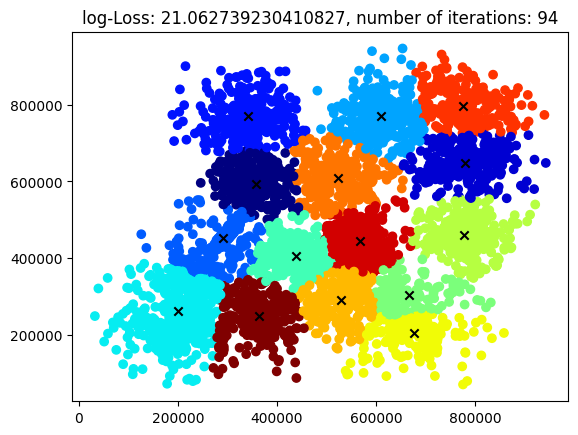

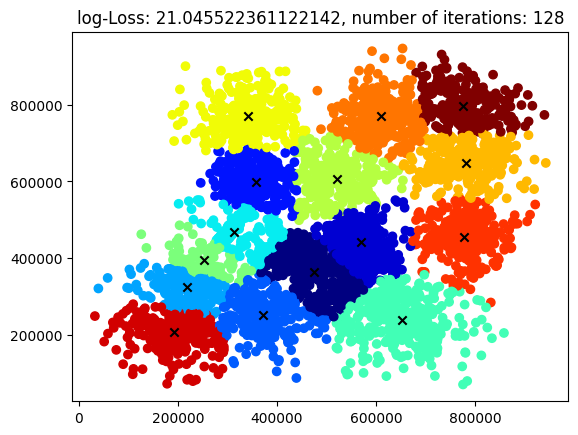

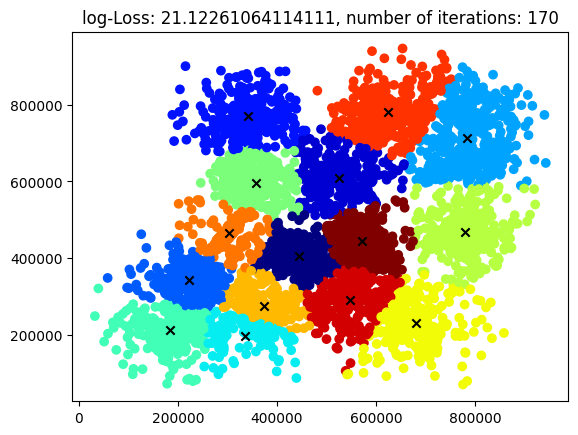

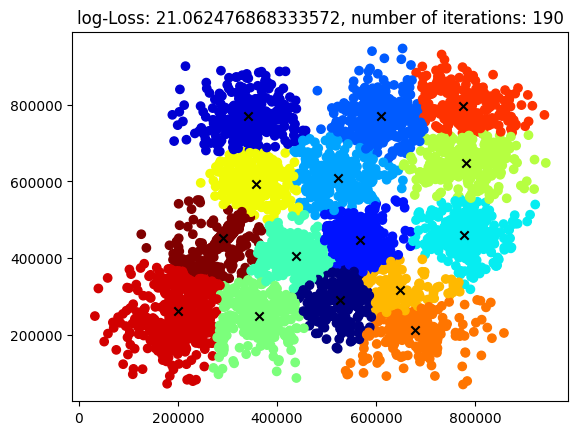

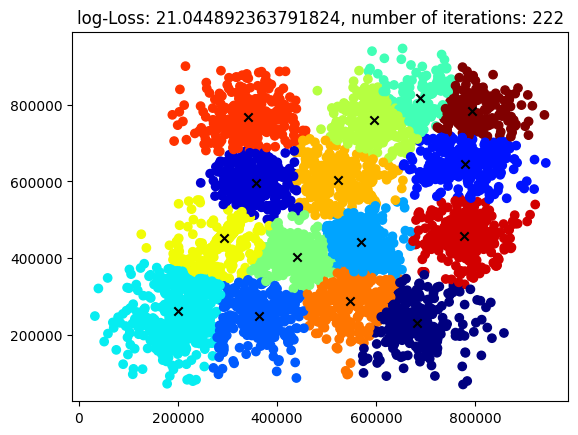

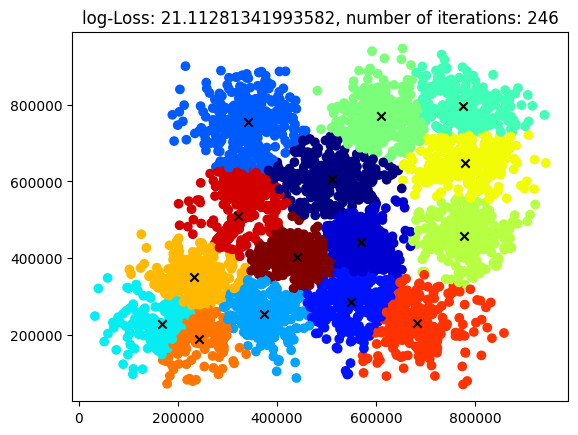

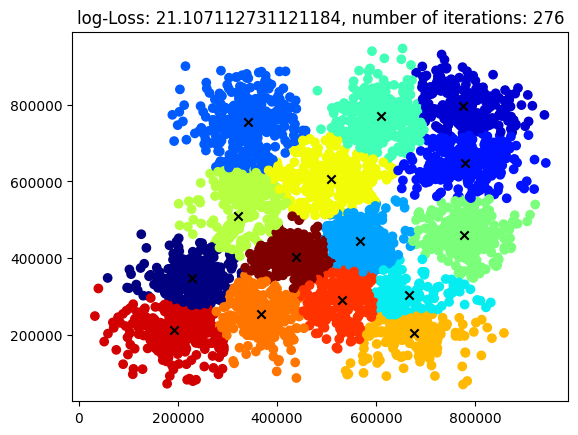

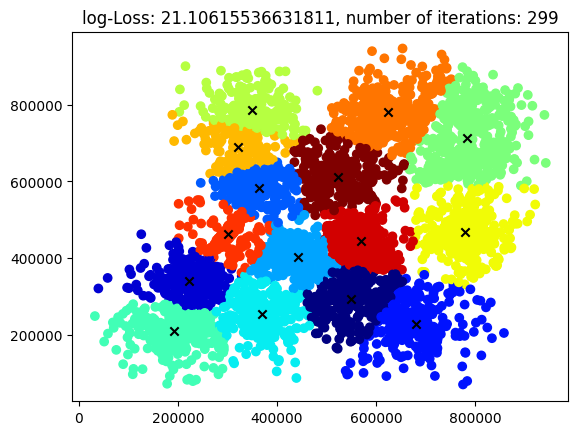

In [16]:
from matplotlib import pyplot as plt
kmeans = MyKmeans(k=15)
cmap = plt.get_cmap('jet', kmeans.k)
for i in range(10):
    kmeans.fit(X, random_choice=i)
    plt.scatter(X[:,0], X[:,1], c = kmeans.z, cmap=cmap)
    plt.scatter(kmeans.C[:,0], kmeans.C[:,1], marker='x', color='black')
    plt.title(f'log-Loss: {np.log(kmeans.loss)}, number of iterations: {kmeans.n_iterations}')
    plt.show()

In [17]:
# funny interactive plot to show the evolution of the algorithm
from ipywidgets import interactive, IntSlider
import matplotlib.pyplot as plt

k = MyKmeans(k=15)
k.fit(X, random_choice=0)

cmap = plt.get_cmap('jet', k.k)
def plot_iteration(i):
    plt.scatter(X[:,0], X[:,1], c=k.z_history[:,i], cmap=cmap)
    plt.scatter(k.C_history[:,0,i], k.C_history[:,1,i], marker='x')


slider = IntSlider(min=0, max=k.n_iterations, step=1, value=0)
interactive(plot_iteration, i=slider)



interactive(children=(IntSlider(value=0, description='i', max=28), Output()), _dom_classes=('widget-interact',…

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


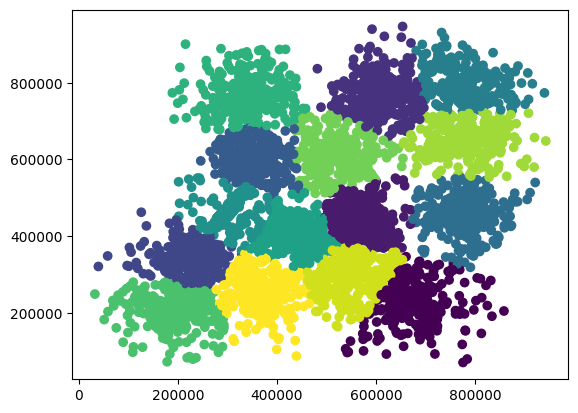

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15)
kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)

In [19]:
# funny code to produce a GIF of the evolution
import os
import imageio

# Initialize k-means object and fit it to the data
k = MyKmeans(k=15)
k.fit(X, random_choice=0)

# Create directory to store the images
if not os.path.exists("iterations"):
    os.makedirs("iterations")

# Create list to store each plot as an image
images = []

# Create plot for each iteration and save as an image
for i in range(k.n_iterations):
    plt.scatter(X[:,0], X[:,1], c=k.z_history[:,i+1])
    plt.scatter(k.C_history[:,0,i+1], k.C_history[:,1,i+1], marker='x')
    plt.title(f"Iteration {i+1}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.savefig(f"iterations/iteration_{i+1}.png")
    plt.close()

    # Append image to list
    images.append(imageio.imread(f"iterations/iteration_{i+1}.png"))

# Use imageio to create GIF from list of images
imageio.mimsave("kmeans.gif", images, duration=1)


/var/folders/m2/r059lv3n7nq9x6gh78v25xk80000gn/T/ipykernel_26336/3928499854.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"iterations/iteration_{i+1}.png"))
